In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from wordsegment import load, segment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
load()

%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [2]:
df_train = pd.read_csv('train_data.csv')
df_labels = pd.read_csv('train_label.csv')
df_test = pd.read_csv('test_data.csv')

In [3]:
df_train = df_train[['id', 'text']]

In [4]:
df_train

,id,text
0,122885,"Keep your gloves, hats, coats and jackets together where you need them with the Entryway Cubbie Shelf. Perfect for any front hallway, mudroom or home office, it's three compartments have room for everything from mittens to schoolbooks. Four large hooks provide sturdy storage for your outerwear, scarves and tote bags. Install it easily with our innovative hanging rail system and get the versatile entryway piece you have been missing.Finished in durable fresh white laminateEasy to install two-piece hanging rail system includedConstructed from CARB-compliant, laminated composite woodsShips ready to assemble, includes an instruction booklet for easy assembly and has a 5-year manufacturer's limited warranty on partsAssembled dimensions: 48 in. W x 16.5 in. H x 11.5 in. DInternal dimensions: 14.25 in. W x 8.75 in. H x 10 in. D (each cubbie)"
1,188958,"The Home Dynamix Serendipity Ivory 5 ft. 2 in. x 7 ft. 6 in. Area Rug is made with heat-set polypropylene and has a jute backing for durability. This area rug features a ivory color to match many home interiors and should be professionally cleaned for maintenance. Designed for indoor use, this beautiful rug is machine made in Belgium.Made of heat-set PolypropyleneJute backing for durabilityMachine made in TurkeyProfessionally clean for maintenanceHigh-density weave for durabilityVacuum regularly, professionally clean.Please Note: The digital images and product dimensions on our website are as accurate as possible. Due to differences in computer monitors, some rug colors may vary slightly. Lengths and widths may vary from the published dimensions. We do our best to provide you with an exact measurement, but please be advised that some variation exists. Patterns may vary slightly according to shape and size selectedIntricate design on a classic border patterned area rug make a beautiful addition to your decor"
2,146065,"The Bosch 18-Volt lithium-ion line of Cordless Reciprocal Saws uses the industry's most advanced lithium-ion technology for greater battery life and more run time, all in a lighter package. Bosch CRS180K 18 Volt Cordless lithium-ion 1-1/8 in. Reciprocating Saw Compact size makes it easier to get into tight spaces. Lightweight tool equals less fatigue. 2-speed allows you to adjust to the material your up against. Lock-Jaw blade holder is the easiest blade change system. 1-1/8 in. stroke allows for more material to be removed per stroke. Variable speed triggers helps you ease into the material without a kickback.Compact size makes it easier to get into tight spacesLightweight tool equals less fatigue2 speeds allows you to adjust to the material your up againstLock-jaw blade holder is the easiest blade change systemElectronic Motor Protection (EMP) protects the motor against overload and ensures a long lifetimeBosch Electronic Cell Protection (ECP) protects the battery against overload, overheating and deep dischargeHome Depot Protection Plan:"
3,165138,"Restore your Porter-Cable sander or polisher to its original prowess with this 6 in. Adhesive-Back Replacement Pad. It's not unusual for an original pad to get dinged up around the edge with frequent use, so turn to this reliever to shore up your prodigious sanding and polishing skills.Designed for use with 7346SP, 7424, 7336SP, 7424XP, 7435, 7345, 7346, 97455, 97466, 7335, 7336, 97355 and 97366 Porter-Cable sanders and polishers6 in. standard diameter accepts identically shaped adhesive-backed sanding and polishing discs (sold separately)Allows your sander or polisher to work targeted area with precisionNot intended for use above 10,000 RPM"
4,185565,"The SPIKECUBE Surge Suppressor from Tripp Lite is a direct plug-in suppressor providing protection on one AC outlet. Its small size makes it ideal for protecting laptop computers, projectors and other portable electronics. A green ""Protected"" and red ""Grounded"" LED illuminates to indicate that adequate surge suppression is available. The unit has 600 jou

In [5]:
df_train.shape

(41569, 2)

In [6]:
df_labels.shape

(75170, 2)

In [7]:
df_labels.head(10)

,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified
5,100008,Finish
6,100008,Indoor/Outdoor
7,100008,Package Quantity
8,100011,Features
9,100011,Included


From above we can see that the labels are on the repeated ids. Which means that the following case of **Multi Label Classification**.

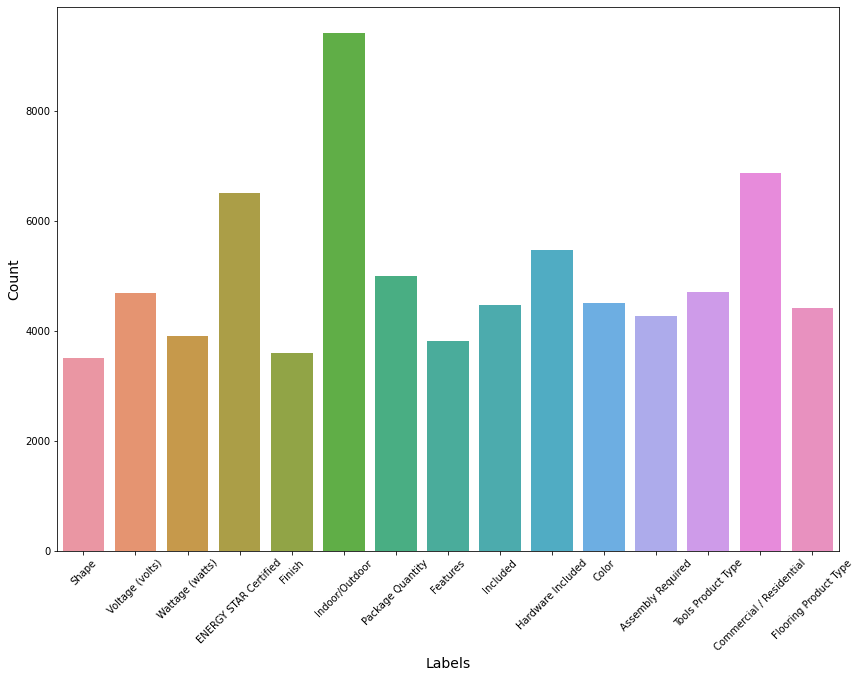

In [8]:
plt.figure(figsize= (14, 10))
sns.countplot(x = 'label', data= df_labels)
plt.xticks(rotation = 45)
plt.xlabel('Labels', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

We have 15 different features in the dataset and the classifaction of the data is based on Multi Label Classification.


In [9]:
df_labels = df_labels.groupby('id')['label'].apply(','.join).reset_index()
df_labels

,id,label
0,100003,Shape
1,100004,"Voltage (volts),Wattage (watts)"
2,100006,Wattage (watts)
3,100007,ENERGY STAR Certified
4,100008,"Finish,Indoor/Outdoor,Package Quantity"
...,...,...
41564,224416,Finish
41565,224419,Package Quantity
41566,224421,"Included,Shape,Voltage (volts),Wattage (watts)"
41567,224422,"Finish,Indoor/Outdoor,Package Quantity"


In [10]:
df = pd.merge(df_train, df_labels, on = 'id', how= 'outer')
df

,id,text,label
0,122885,"Keep your gloves, hats, coats and jackets together where you need them with the Entryway Cubbie Shelf. Perfect for any front hallway, mudroom or home office, it's three compartments have room for everything from mittens to schoolbooks. Four large hooks provide sturdy storage for your outerwear, scarves and tote bags. Install it easily with our innovative hanging rail system and get the versatile entryway piece you have been missing.Finished in durable fresh white laminateEasy to install two-piece hanging rail system includedConstructed from CARB-compliant, laminated composite woodsShips ready to assemble, includes an instruction booklet for easy assembly and has a 5-year manufacturer's limited warranty on partsAssembled dimensions: 48 in. W x 16.5 in. H x 11.5 in. DInternal dimensions: 14.25 in. W x 8.75 in. H x 10 in. D (each cubbie)","Assembly Required,Finish,Hardware Included"
1,188958,"The Home Dynamix Serendipity Ivory 5 ft. 2 in. x 7 ft. 6 in. Area Rug is made with heat-set polypropylene and has a jute backing for durability. This area rug features a ivory color to match many home interiors and should be professionally cleaned for maintenance. Designed for indoor use, this beautiful rug is machine made in Belgium.Made of heat-set PolypropyleneJute backing for durabilityMachine made in TurkeyProfessionally clean for maintenanceHigh-density weave for durabilityVacuum regularly, professionally clean.Please Note: The digital images and product dimensions on our website are as accurate as possible. Due to differences in computer monitors, some rug colors may vary slightly. Lengths and widths may vary from the published dimensions. We do our best to provide you with an exact measurement, but please be advised that some variation exists. Patterns may vary slightly according to shape and size selectedIntricate design on a classic border patterned area rug make a beautiful addition to your decor","Commercial / Residential,Features,Flooring Product Type,Indoor/Outdoor"
2,146065,"The Bosch 18-Volt lithium-ion line of Cordless Reciprocal Saws uses the industry's most advanced lithium-ion technology for greater battery life and more run time, all in a lighter package. Bosch CRS180K 18 Volt Cordless lithium-ion 1-1/8 in. Reciprocating Saw Compact size makes it easier to get into tight spaces. Lightweight tool equals less fatigue. 2-speed allows you to adjust to the material your up against. Lock-Jaw blade holder is the easiest blade change system. 1-1/8 in. stroke allows for more material to be removed per stroke. Variable speed triggers helps you ease into the material without a kickback.Compact size makes it easier to get into tight spacesLightweight tool equals less fatigue2 speeds allows you to adjust to the material your up againstLock-jaw blade holder is the easiest blade change systemElectronic Motor Protection (EMP) protects the motor against overload and ensures a long lifetimeBosch Electronic Cell Protection (ECP) protects the battery against overload, overheating and deep dischargeHome Depot Protection Plan:","Tools Product Type,Voltage (volts)"
3,165138,"Restore your Porter-Cable sander or polisher to its original prowess with this 6 in. Adhesive-Back Replacement Pad. It's not unusual for an original pad to get dinged up around the edge with frequent use, so turn to this reliever to shore up your prodigious sanding and polishing skills.Designed for use with 7346SP, 7424, 7336SP, 7424XP, 7435, 7345, 7346, 97455, 97466, 7335, 7336, 97355 and 97366 Porter-Cable sanders and polishers6 in. standard diameter accepts identically shaped adhesive-backed sanding and polishing discs (sold separately)Allows your sander or polisher to work targeted area with precisionNot intended for use above 10,000 RPM",Tools Product Type
4,185565,"The SPIKECUBE Surge Suppressor from Tripp Lite is a direct plug-in suppressor providing protection on one AC outlet. Its small size makes it ideal for protecting laptop computers, 

### Noise Removal

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words('english'))


def pre_process(text):
    
    #lower casing
    text = text.lower()
        
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    
    return ' '.join(text)

df['text'] = df['text'].apply(lambda x:pre_process(x))

In [12]:
df['text'][1]

'home dynamix serendipity ivory area rug made heat set polypropylene jute backing durability area rug feature ivory color match many home interior professionally cleaned maintenance designed indoor use beautiful rug machine made belgium made heat set polypropylenejute backing durabilitymachine made turkeyprofessionally clean maintenancehigh density weave durabilityvacuum regularly professionally clean please note digital image product dimension website accurate possible due difference computer monitor rug color may vary slightly length width may vary published dimension best provide exact measurement please advised variation exists pattern may vary slightly according shape size selectedintricate design classic border patterned area rug make beautiful addition decor'

In [13]:
data = []

for i in tqdm(range(len(df))):
    text = segment(df['text'][i])
    text = ' '.join(text)
    data.append(text)
    i+=1

100%|███████████████████████████████████| 41569/41569 [5:18:41<00:00,  2.17it/s]


In [23]:
m = pd.DataFrame(data, columns=['text'])

In [34]:
df['text'] = m

In [35]:
def pre_process(text):
    
    #lower casing
    text = text.lower()
        
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    
    return ' '.join(text)

df['text'] = df['text'].apply(lambda x:pre_process(x))

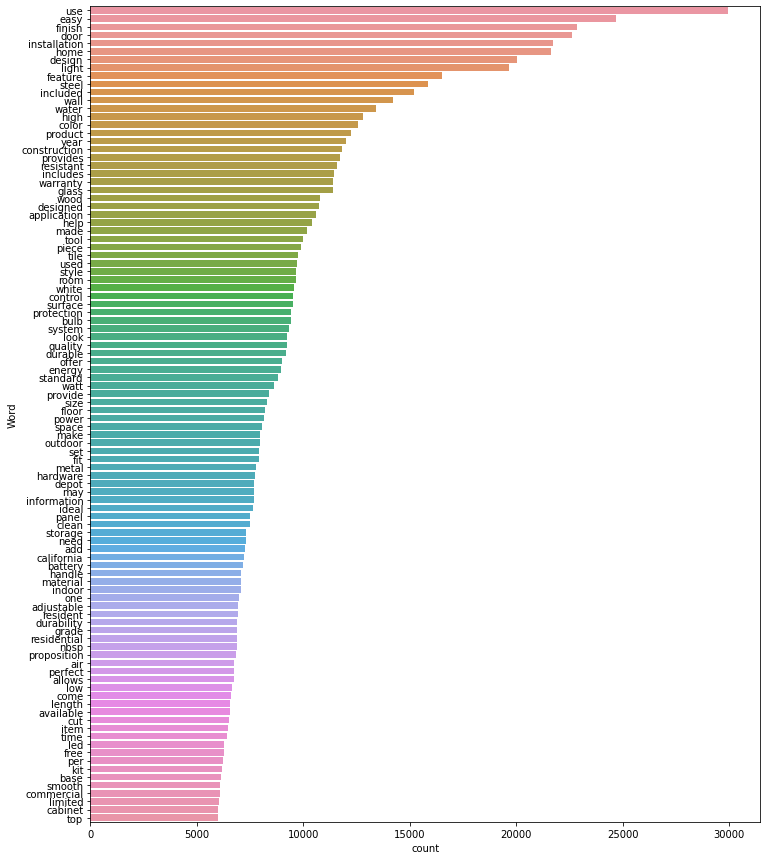

In [39]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
    # print 100 most frequent words 
freq_words(df['text'], 100)

**use, easy, finish, door, installation** are some words with higher frequency in the dataframe.

In [40]:
label = []

for i in tqdm(range(len(df))):
    text = df['label'][i].split(',')
    label.append(text)
    i+=1

100%|█████████████████████████████████| 41569/41569 [00:00<00:00, 191279.33it/s]


In [43]:
df['label'] = label

In [44]:
df['label'][1]

['Commercial / Residential',
 'Features',
 'Flooring Product Type',
 'Indoor/Outdoor']

### Converting Text to Features

In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(df['label'])
y = mlb.transform(df['label'])

In [46]:
y.shape

(41569, 15)

In [52]:
xtrain, xval, ytrain, yval = train_test_split(df['text'], y, test_size=0.2, random_state = 42)

In [54]:
tfidf = TfidfVectorizer(max_features=8000)

# create TF-IDF features
xtrain_tfidf = tfidf.fit_transform(xtrain)
xval_tfidf = tfidf.transform(xval)

In [55]:
xtrain_tfidf.shape

(33255, 8000)

In [56]:
xval_tfidf.shape

(8314, 8000)

### Model Building Based on Multi Label

In [59]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, 
                            f1_score, classification_report, roc_curve, roc_curve 
from sklearn.multioutput import MultiOutputClassifier

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [61]:
alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier1 = OneVsRestClassifier(BernoulliNB(alpha=i))
    classifier1.fit(xtrain_tfidf, ytrain)
    pred1 = classifier1.predict(xtrain_tfidf)
    pred2 = classifier1.predict(xval_tfidf)
    f1 = f1_score(ytrain, pred1, average='micro')
    f2 = f1_score(yval, pred2, average='micro')
    report1 = classification_report(ytrain, pred1, zero_division= 1)
    report2 = classification_report(yval, pred2, zero_division= 1)
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print('Classification Report Train: \n', report1)
    print(" F1-measure for cv: {:.4f}".format( f2))
    print('Classification Report Validation: \n', report2)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.7880
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81      3392
           1       0.64      0.86      0.73      3613
           2       0.96      0.69      0.80      5506
           3       0.82      0.93      0.87      5246
           4       0.95      0.89      0.92      3079
           5       0.59      0.95      0.73      2885
           6       0.99      0.86      0.92      3545
           7       0.55      0.90      0.68      4384
           8       0.75      0.84      0.79      3592
           9       0.85      0.77      0.81      7544
          10       0.64      0.90      0.75      4009
          11       0.55      0.86      0.67      2811
          12       0.75      0.98      0.85      3731
          13       0.66      0.92      0.77      3767
          14       0.62      0.96      0.75      3157

   micro avg       0.72      0

Micro-average quality numbers for C= 10
 F1-measure for train: 0.7116
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72      3392
           1       0.62      0.47      0.54      3613
           2       0.94      0.61      0.74      5506
           3       0.74      0.88      0.80      5246
           4       0.87      0.70      0.78      3079
           5       0.66      0.74      0.70      2885
           6       0.99      0.78      0.87      3545
           7       0.59      0.74      0.66      4384
           8       0.73      0.59      0.65      3592
           9       0.84      0.66      0.74      7544
          10       0.61      0.81      0.70      4009
          11       0.65      0.51      0.57      2811
          12       0.72      0.89      0.79      3731
          13       0.58      0.78      0.67      3767
          14       0.55      0.80      0.65      3157

   micro avg       0.71      0.71

In [77]:
alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier1 = OneVsRestClassifier(MultinomialNB(alpha=i))
    classifier1.fit(xtrain_tfidf, ytrain)
    pred1 = classifier1.predict(xtrain_tfidf)
    pred2 = classifier1.predict(xval_tfidf)
    f1 = f1_score(ytrain, pred1, average='micro')
    f2 = f1_score(yval, pred2, average='micro')
    report1 = classification_report(ytrain, pred1, zero_division= 1)
    report2 = classification_report(yval, pred2, zero_division= 1)
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print('Classification Report Train: \n', report1)
    print(" F1-measure for cv: {:.4f}".format( f2))
    print('Classification Report Validation: \n', report2)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.8447
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3392
           1       0.89      0.60      0.72      3613
           2       0.97      0.74      0.84      5506
           3       0.93      0.89      0.91      5246
           4       0.96      0.89      0.92      3079
           5       0.84      0.81      0.83      2885
           6       0.99      0.92      0.96      3545
           7       0.82      0.74      0.78      4384
           8       0.90      0.76      0.82      3592
           9       0.89      0.77      0.83      7544
          10       0.95      0.76      0.84      4009
          11       0.91      0.68      0.78      2811
          12       0.92      0.92      0.92      3731
          13       0.80      0.91      0.85      3767
          14       0.73      0.88      0.80      3157

   micro avg       0.89      0

Micro-average quality numbers for C= 10
 F1-measure for train: 0.4041
Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.08      3392
           1       0.95      0.01      0.01      3613
           2       0.99      0.49      0.66      5506
           3       0.96      0.48      0.64      5246
           4       0.99      0.16      0.28      3079
           5       1.00      0.01      0.01      2885
           6       0.99      0.71      0.83      3545
           7       0.99      0.02      0.04      4384
           8       1.00      0.01      0.02      3592
           9       0.86      0.41      0.56      7544
          10       1.00      0.26      0.41      4009
          11       1.00      0.00      0.01      2811
          12       1.00      0.36      0.53      3731
          13       0.97      0.21      0.34      3767
          14       0.97      0.19      0.32      3157

   micro avg       0.96      0.26

#  Model Selection
Basically there are three ways to solve Multi-Label Classification Problem:
1. **Problem Transformation :** In this method, we will try to transform our multi-label problem into single-label problem(s)

Problem Transformation is carried by three different ways :
1. Binary Relevance
2. Classifier Chains
3. Label Powerset



# Binary Relevance
This is the simplest technique, which basically treats each label as a separate single class classification problem.

In binary relevance, this problem is broken into 4 different single class classification problems as shown in the figure below.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230630/Screen-Shot-2017-08-21-at-1.46.00-AM.png" alt="Binary Relevance" />


In [89]:
from skmultilearn.problem_transform  import BinaryRelevance

In [95]:
alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier1 = BinaryRelevance(MultinomialNB(alpha=i))
    classifier1.fit(xtrain_tfidf, ytrain)
    pred1 = classifier1.predict(xtrain_tfidf)
    pred2 = classifier1.predict(xval_tfidf)
    f1 = f1_score(ytrain, pred1, average='micro')
    f2 = f1_score(yval, pred2, average='micro')
    accu1 = accuracy_score(ytrain,pred1)
    accu2 = accuracy_score(yval, pred2)
    report1 = classification_report(ytrain, pred1, zero_division= 1)
    report2 = classification_report(yval, pred2, zero_division= 1)
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print('Classification Report Train: \n', report1)
    print(" F1-measure for cv: {:.4f}".format( f2))
    print('Classification Report Validation: \n', report2)
    print('Accuracy Train : ', accu1)
    print('Accuracy Validation :', accu2)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.8447
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3392
           1       0.89      0.60      0.72      3613
           2       0.97      0.74      0.84      5506
           3       0.93      0.89      0.91      5246
           4       0.96      0.89      0.92      3079
           5       0.84      0.81      0.83      2885
           6       0.99      0.92      0.96      3545
           7       0.82      0.74      0.78      4384
           8       0.90      0.76      0.82      3592
           9       0.89      0.77      0.83      7544
          10       0.95      0.76      0.84      4009
          11       0.91      0.68      0.78      2811
          12       0.92      0.92      0.92      3731
          13       0.80      0.91      0.85      3767
          14       0.73      0.88      0.80      3157

   micro avg       0.89      0

Micro-average quality numbers for C= 10
 F1-measure for train: 0.4041
Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.08      3392
           1       0.95      0.01      0.01      3613
           2       0.99      0.49      0.66      5506
           3       0.96      0.48      0.64      5246
           4       0.99      0.16      0.28      3079
           5       1.00      0.01      0.01      2885
           6       0.99      0.71      0.83      3545
           7       0.99      0.02      0.04      4384
           8       1.00      0.01      0.02      3592
           9       0.86      0.41      0.56      7544
          10       1.00      0.26      0.41      4009
          11       1.00      0.00      0.01      2811
          12       1.00      0.36      0.53      3731
          13       0.97      0.21      0.34      3767
          14       0.97      0.19      0.32      3157

   micro avg       0.96      0.26

# Classifier Chain
In this, the first classifier is trained just on the input data and then each next classifier is trained on the input space and all the previous classifiers in the chain.

In classifier chains, this problem would be transformed into 4 different single label problems, just like shown below. Here yellow colored is the input space and the white part represent the target variable.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25233225/Screen-Shot-2017-08-25-at-11.31.58-PM.png" alt="Classifier Chain" />



This is quite similar to binary relevance, the only difference being it forms chains in order to preserve label correlation. So, let’s try to implement this using multi-learn library.

In [96]:
from skmultilearn.problem_transform import ClassifierChain

alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier1 = ClassifierChain(MultinomialNB(alpha=i))
    classifier1.fit(xtrain_tfidf, ytrain)
    pred1 = classifier1.predict(xtrain_tfidf)
    pred2 = classifier1.predict(xval_tfidf)
    f1 = f1_score(ytrain, pred1, average='micro')
    f2 = f1_score(yval, pred2, average='micro')
    accu1 = accuracy_score(ytrain,pred1)
    accu2 = accuracy_score(yval, pred2)
    report1 = classification_report(ytrain, pred1, zero_division= 1)
    report2 = classification_report(yval, pred2, zero_division= 1)
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print('Classification Report Train: \n', report1)
    print(" F1-measure for cv: {:.4f}".format( f2))
    print('Classification Report Validation: \n', report2)
    print('Accuracy Train : ', accu1)
    print('Accuracy Validation :', accu2)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.8367
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.89      0.82      0.85      3392
           1       0.89      0.60      0.72      3613
           2       0.98      0.74      0.84      5506
           3       0.92      0.90      0.91      5246
           4       0.96      0.88      0.91      3079
           5       0.82      0.85      0.84      2885
           6       0.99      0.93      0.96      3545
           7       0.75      0.78      0.76      4384
           8       0.88      0.75      0.81      3592
           9       0.87      0.74      0.80      7544
          10       0.91      0.82      0.86      4009
          11       0.83      0.68      0.75      2811
          12       0.91      0.95      0.93      3731
          13       0.75      0.93      0.83      3767
          14       0.65      0.93      0.76      3157

   micro avg       0.86      0

Micro-average quality numbers for C= 10
 F1-measure for train: 0.4705
Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.08      3392
           1       0.96      0.01      0.01      3613
           2       0.99      0.50      0.66      5506
           3       0.96      0.54      0.69      5246
           4       0.99      0.18      0.31      3079
           5       1.00      0.01      0.03      2885
           6       0.99      0.78      0.87      3545
           7       0.99      0.05      0.09      4384
           8       1.00      0.04      0.08      3592
           9       0.84      0.44      0.58      7544
          10       1.00      0.33      0.49      4009
          11       1.00      0.03      0.05      2811
          12       0.97      0.57      0.72      3731
          13       0.89      0.41      0.57      3767
          14       0.87      0.33      0.48      3157

   micro avg       0.94      0.31

### Label Powerset

In this, we transform the problem into a multi-class problem with one multi-class classifier is trained on all unique label combinations found in the training data.

Lets take an example:

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230858/Screen-Shot-2017-08-25-at-12.46.30-AM.png" alt="Label Powerset" />

In this, we find that x1 and x4 have the same labels, similarly, x3 and x6 have the same set of labels. So, label powerset transforms this problem into a single multi-class problem as shown below.

<img src ="https://cdn.analyticsvidhya.com/wp-content/uploads/2017/08/25230915/Screen-Shot-2017-08-25-at-12.46.37-AM.png" alt = 'Label Powerset 2' />

So, label powerset has given a unique class to every possible label combination that is present in the training set.


In [97]:
from skmultilearn.problem_transform import LabelPowerset

alpha=[0.001,0.01,0.1,1,10]
for i in alpha:
    classifier1 = LabelPowerset(MultinomialNB(alpha=i))
    classifier1.fit(xtrain_tfidf, ytrain)
    pred1 = classifier1.predict(xtrain_tfidf)
    pred2 = classifier1.predict(xval_tfidf)
    f1 = f1_score(ytrain, pred1, average='micro')
    f2 = f1_score(yval, pred2, average='micro')
    accu1 = accuracy_score(ytrain,pred1)
    accu2 = accuracy_score(yval, pred2)
    report1 = classification_report(ytrain, pred1, zero_division= 1)
    report2 = classification_report(yval, pred2, zero_division= 1)
    print("Micro-average quality numbers for C=",i)
    print(" F1-measure for train: {:.4f}".format( f1))
    print('Classification Report Train: \n', report1)
    print(" F1-measure for cv: {:.4f}".format( f2))
    print('Classification Report Validation: \n', report2)
    print('Accuracy Train : ', accu1)
    print('Accuracy Validation :', accu2)

Micro-average quality numbers for C= 0.001
 F1-measure for train: 0.9574
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      3392
           1       0.90      0.95      0.92      3613
           2       0.95      0.98      0.96      5506
           3       0.97      0.98      0.98      5246
           4       0.96      0.99      0.97      3079
           5       0.92      0.96      0.94      2885
           6       0.99      0.99      0.99      3545
           7       0.91      0.95      0.93      4384
           8       0.93      0.98      0.96      3592
           9       0.94      0.97      0.96      7544
          10       0.95      0.95      0.95      4009
          11       0.94      0.94      0.94      2811
          12       0.97      0.99      0.98      3731
          13       0.93      0.98      0.96      3767
          14       0.94      0.96      0.95      3157

   micro avg       0.94      0

Micro-average quality numbers for C= 10
 F1-measure for train: 0.6042
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.53      0.71      0.60      3392
           1       0.63      0.37      0.47      3613
           2       0.93      0.67      0.78      5506
           3       0.85      0.72      0.78      5246
           4       0.94      0.60      0.73      3079
           5       1.00      0.16      0.27      2885
           6       0.94      0.90      0.92      3545
           7       0.81      0.39      0.53      4384
           8       0.84      0.33      0.48      3592
           9       0.82      0.53      0.65      7544
          10       0.71      0.56      0.63      4009
          11       0.99      0.07      0.13      2811
          12       0.36      0.99      0.53      3731
          13       0.85      0.23      0.37      3767
          14       0.87      0.42      0.56      3157

   micro avg       0.70      0.53

## Final Selection of Model for the Best Accuracy

In [98]:
#using NaiveBayes - Multinomial algorithm with alpha= 0.001

classifier1 = LabelPowerset(MultinomialNB(alpha=0.001))
classifier1.fit(xtrain_tfidf, ytrain)
pred1 = classifier1.predict(xtrain_tfidf)
pred2 = classifier1.predict(xval_tfidf)
f1 = f1_score(ytrain, pred1, average='micro')
f2 = f1_score(yval, pred2, average='micro')
accu1 = accuracy_score(ytrain,pred1)
accu2 = accuracy_score(yval, pred2)
report1 = classification_report(ytrain, pred1, zero_division= 1)
report2 = classification_report(yval, pred2, zero_division= 1)
print("Micro-average quality numbers for C=",i)
print(" F1-measure for train: {:.4f}".format( f1))
print('Classification Report Train: \n', report1)
print(" F1-measure for cv: {:.4f}".format( f2))
print('Classification Report Validation: \n', report2)
print('Accuracy Train : ', accu1)
print('Accuracy Validation :', accu2)

Micro-average quality numbers for C= 10
 F1-measure for train: 0.9574
Classification Report Train: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      3392
           1       0.90      0.95      0.92      3613
           2       0.95      0.98      0.96      5506
           3       0.97      0.98      0.98      5246
           4       0.96      0.99      0.97      3079
           5       0.92      0.96      0.94      2885
           6       0.99      0.99      0.99      3545
           7       0.91      0.95      0.93      4384
           8       0.93      0.98      0.96      3592
           9       0.94      0.97      0.96      7544
          10       0.95      0.95      0.95      4009
          11       0.94      0.94      0.94      2811
          12       0.97      0.99      0.98      3731
          13       0.93      0.98      0.96      3767
          14       0.94      0.96      0.95      3157

   micro avg       0.94      0.97

We are getting 90% of accuracy with the model. Now we can check if the model is getting the output right.

### Create Inference Function

We also have to take care of the new data that will come in the future. Our tags/label prediction system should be able to take a text data in raw form as input and generate its tag(s).

In [108]:
def infer_tags(q):
    q = segment(q)
    q = ' '.join(q)
    q = pre_process(q)
    q_vec = tfidf.transform([q])
    q_pred = classifier1.predict(q_vec)
    return mlb.inverse_transform(q_pred)

In [109]:
for i in range(5): 
    k = xval.sample(1).index[0] 
    print("Predicted Tags: ", infer_tags(xval[k])), print("Actual Tags: ",df['label'][k], "\n")

Predicted Tags:  [('ENERGY STAR Certified', 'Wattage (watts)')]
Actual Tags:  ['ENERGY STAR Certified', 'Wattage (watts)'] 

Predicted Tags:  [('Indoor/Outdoor',)]
Actual Tags:  ['Indoor/Outdoor'] 

Predicted Tags:  [('Hardware Included',)]
Actual Tags:  ['Hardware Included'] 

Predicted Tags:  [('Package Quantity',)]
Actual Tags:  ['Package Quantity'] 

Predicted Tags:  [('Tools Product Type', 'Voltage (volts)')]
Actual Tags:  ['Tools Product Type', 'Voltage (volts)'] 



## Testing the model on Test Data

Lets check our model with the test data

In [110]:
test = pd.read_csv('test_data.csv')
test.head()

,text,id
0,These machine screw nuts are designed to be used with smaller machine screws (under 1/4 in.) and have a hex drive. Used for fastening to a screw when mechanically joining materials together. Must be used with like materials/sized screws. Available in various materials and finishes to suit your application.California residents: see&nbsp;Proposition 65 information4-per packStainless steel constructionStainless steel finish#8-32Coarse threadNote: product may vary by store,114689
1,"The M18 FUEL Drill/Driver is the Most Powerful 18-Volt cordless drill on the market. At only 7.50 in. in length, it is the Most Compact drill in its class, reducing fatigue when used for extended periods of time and allowing access to tight work spaces. REDLINK PLUS intelligence ensures maximum performance and protection from overload, overheating and over-discharge. The REDLITHIUM XC 5.0 Battery Pack delivers more work per charge and more work over the life of the pack than the competitors. The M18 FUEL Drill/Driver's all-metal ratcheting locking chuck provides maximum grip, bit retention and durability.POWERSTATE brushless motor delivers 1,200 in. lbs. of peak torque and up to 2,000 RPM for faster drilling speedsREDLINK PLUS intelligence prevents damage to the tool and battery due to overloading or overheatingREDLITHIUM XC 5.0 batteries deliver more work per charge and more work over the life of the batteryIncluded: 2703-20 1/2 in. drill/driver, (2) REDLITHIUM XC 5.0 batteries, M12-M18 multi-voltage charger, belt clip, bit holder, side handle, carrying caseCompatible batteries: 48-11-1815, 48-11-1828, 48-11-1840, 48-11-1850, 48-11-1820Home Depot Protection Plan:",183172
2,Steel City 2-Gang 30 cu. in. Square Electrical Box houses and protects electrical switches and devices. The box has a SV bracket that allows the box to be mounted to a wood or steel stud. There are (14) 1/2 in. and 3/4 in. eccentric knockouts making this box very versatile for any application.Use to house and protect 2 electrical switches or receptaclesWelded pre-galvanized steel constructionIncludes (14) 1/2 in. and 3/4 in. eccentric knockoutsSV-bracket for mounting to steel or wood studsUL listedGround bump for grounding wires,217304
3,"Native Collection Plus has Shaw's SilentStep Plus, premium attached backing which reduces noise transmissions, offers easier installation and provides natural hardwood walk sound. Native Collection Plus has appealing designs that will make an impression no matter what the look is. If you're looking for casual, urban, formal or informal - Native Collection Plus laminate has a choice that's just right. This collection has the most sought after species and has the most popular colors in flooring fashion today. Native Collection Plus has exclusive visuals that will add a more upscale look to any room.California residents: see&nbsp;Proposition 65 informationNative Collection Plus Laminate Flooring8 mm thickness x 8 in. width x 47-9/16 in. length planks21.12 sq. ft. per case. Case weight: 27.69 lbs.Gunstock Oak, Medium Color, Smooth FinishPlanks have a square edgeAttached underlayment that reduces sound and increases ease of installationAppropriate Grade for Installation: All GradesApproved for radiant heatingCan be installed over both concrete and wooden subfloorsResidential use20-year residential warrantyDon't forget your coordinating trim and moldingsAll online orders for this item ship via parcel ground and may arrive in multiple boxes",184115
4,"Fasade decorative 4 ft. x 8 ft. vinyl wall panels easily transform any room with their unique architectural design at a fraction of the cost of other decorative panels. The panels are water-resistant and durable which make them perfect for high abuse areas in your home including the garage, bathroom or utility room. These decorative wall panels come in 4 ft. x 8 ft. x .028 in. thick sheets in multiple styles and finishes from traditional to modern, so there is style and color for all of your desig

In [111]:
test.drop(['id'], axis =1, inplace=True)

In [115]:
test.head()

,text
0,These machine screw nuts are designed to be used with smaller machine screws (under 1/4 in.) and have a hex drive. Used for fastening to a screw when mechanically joining materials together. Must be used with like materials/sized screws. Available in various materials and finishes to suit your application.California residents: see&nbsp;Proposition 65 information4-per packStainless steel constructionStainless steel finish#8-32Coarse threadNote: product may vary by store
1,"The M18 FUEL Drill/Driver is the Most Powerful 18-Volt cordless drill on the market. At only 7.50 in. in length, it is the Most Compact drill in its class, reducing fatigue when used for extended periods of time and allowing access to tight work spaces. REDLINK PLUS intelligence ensures maximum performance and protection from overload, overheating and over-discharge. The REDLITHIUM XC 5.0 Battery Pack delivers more work per charge and more work over the life of the pack than the competitors. The M18 FUEL Drill/Driver's all-metal ratcheting locking chuck provides maximum grip, bit retention and durability.POWERSTATE brushless motor delivers 1,200 in. lbs. of peak torque and up to 2,000 RPM for faster drilling speedsREDLINK PLUS intelligence prevents damage to the tool and battery due to overloading or overheatingREDLITHIUM XC 5.0 batteries deliver more work per charge and more work over the life of the batteryIncluded: 2703-20 1/2 in. drill/driver, (2) REDLITHIUM XC 5.0 batteries, M12-M18 multi-voltage charger, belt clip, bit holder, side handle, carrying caseCompatible batteries: 48-11-1815, 48-11-1828, 48-11-1840, 48-11-1850, 48-11-1820Home Depot Protection Plan:"
2,Steel City 2-Gang 30 cu. in. Square Electrical Box houses and protects electrical switches and devices. The box has a SV bracket that allows the box to be mounted to a wood or steel stud. There are (14) 1/2 in. and 3/4 in. eccentric knockouts making this box very versatile for any application.Use to house and protect 2 electrical switches or receptaclesWelded pre-galvanized steel constructionIncludes (14) 1/2 in. and 3/4 in. eccentric knockoutsSV-bracket for mounting to steel or wood studsUL listedGround bump for grounding wires
3,"Native Collection Plus has Shaw's SilentStep Plus, premium attached backing which reduces noise transmissions, offers easier installation and provides natural hardwood walk sound. Native Collection Plus has appealing designs that will make an impression no matter what the look is. If you're looking for casual, urban, formal or informal - Native Collection Plus laminate has a choice that's just right. This collection has the most sought after species and has the most popular colors in flooring fashion today. Native Collection Plus has exclusive visuals that will add a more upscale look to any room.California residents: see&nbsp;Proposition 65 informationNative Collection Plus Laminate Flooring8 mm thickness x 8 in. width x 47-9/16 in. length planks21.12 sq. ft. per case. Case weight: 27.69 lbs.Gunstock Oak, Medium Color, Smooth FinishPlanks have a square edgeAttached underlayment that reduces sound and increases ease of installationAppropriate Grade for Installation: All GradesApproved for radiant heatingCan be installed over both concrete and wooden subfloorsResidential use20-year residential warrantyDon't forget your coordinating trim and moldingsAll online orders for this item ship via parcel ground and may arrive in multiple boxes"
4,"Fasade decorative 4 ft. x 8 ft. vinyl wall panels easily transform any room with their unique architectural design at a fraction of the cost of other decorative panels. The panels are water-resistant and durable which make them perfect for high abuse areas in your home including the garage, bathroom or utility room. These decorative wall panels come in 4 ft. x 8 ft. x .028 in. thick sheets in multiple styles and finishes from traditional to modern, so there is style and color for all of your design needs.Made from vinyl (PVC) m

In [126]:
for i in range(5): 
    k = test.sample(1).index[0]
    print(test['text'][k])
    print("Predicted Tags: ", infer_tags(test['text'][k]))

Get a deep clean while keeping hands grime free with this plastic mesh scourer. Its hand-saver design keeps your hand away from the mess, and the plastic mesh is safe on most household surfaces. Mesh is treated with an antimicrobial agent that protects against odor-causing bacteria, mold and mildew.Plastic mesh scourerHand-saver designAntimicrobial treatment3 pack plastic mesh scourerBy Quickie manufacturing
Predicted Tags:  [('Color',)]
This powerful Dual Fuel double oven range by KitchenAid can satisfy the culinary needs of the most demanding cooks. It combines the precise control of gas with an electric oven. It features a Steam Rack that offers the ability to add moisture to the oven, enhancing cooking results. It also produces flawless cooking results with Even-Heat True Convection. The unique bow-tie design and convection fan ensure the inside of the entire oven is heated to, and stays at, the perfect temperature.California residents: see&nbsp;Proposition 65 information6.7 cu. ft

In [122]:
infer_tags('Fasade decorative 4 ft. x 8 ft. vinyl wall panels easily transform any room with their unique architectural design at a fraction of the cost of other decorative panels. The panels are water-resistant and durable which make them perfect for high abuse areas in your home including the garage, bathroom or utility room. These decorative wall panels come in 4 ft. x 8 ft. x .028 in. thick sheets in multiple styles and finishes from traditional to modern, so there is style and color for all of your design needs.Made from vinyl (PVC) material, these panels will not rust, corrode or stain and are hypoallergenic, resist mold, mildew and bacteriaPanels are light, flexible and easy to cut; eliminating the need for a contractor, only requiring a tape measure, scissors and PL tube adhesive for a for a quick installation4 ft. x 8 ft. x .028 in. thick panels cover 32 sq. ft. and can be used as a wall panel or for a seamless backsplash applicationPanels are Class A rated and are heat resistant up to 140Simple to clean with non-harsh cleaning productsA variety of trim pieces are available to complete your lookUse these vinyl panels with laminated finishes to create the look of classic tin panels without paying the price of real metal and, white, paintable panels are also availableACP has been an industry leader for 20 years and prides itself on its products2 panel minimum purchase is required')

[('Color',)]

In [123]:
infer_tags('Steel City 2-Gang 30 cu. in. Square Electrical Box houses and protects electrical switches and devices. The box has a SV bracket that allows the box to be mounted to a wood or steel stud. There are (14) 1/2 in. and 3/4 in. eccentric knockouts making this box very versatile for any application.Use to house and protect 2 electrical switches or receptaclesWelded pre-galvanized steel constructionIncludes (14) 1/2 in. and 3/4 in. eccentric knockoutsSV-bracket for mounting to steel or wood studsUL listedGround bump for grounding wires')

[('Package Quantity',)]

We can also go for Scikit-Multilearn Adapted Algorithms to imporve accuracy of the model.

Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN.